In [78]:
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install tensorflow
%pip install regressionmetrics

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached regressionmetrics-1.4.0-py3-none-any.whl (9.0 kB)
INFO: pip is looking at multiple versions of regressionmetrics to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement tensorflow-cpu (from regressionmetrics) (from versions: none)
ERROR: No matching distribution found for tensorflow-cpu
Note: you may need to restart the kernel to use updated packages.


In [79]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from datetime import datetime

mpl.rcParams['figure.figsize'] = (12, 10)
mpl.rcParams['axes.grid'] = False

In [114]:
dateParser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
dataset = pd.read_csv("./datasets/final/final-formed-auvergrid.csv", delimiter=',', date_parser=dateParser, parse_dates=['Timestamp'])

date_time = pd.to_datetime(dataset['Timestamp'], format='%Y-%m-%d %H:%M:%S')

/var/folders/rz/x38ry1m901jcjct47ydtrgph0000gn/T/ipykernel_55556/1625457952.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = pd.read_csv("./datasets/final/final-formed-auvergrid.csv", delimiter=',', date_parser=dateParser, parse_dates=['Timestamp'])


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      8760 non-null   datetime64[ns]
 1   CPUTime        8760 non-null   int64         
 2   Memory         8760 non-null   int64         
 3   NJobs          8760 non-null   int64         
 4   NProcs         8760 non-null   int64         
 5   ArrivedJobs    8760 non-null   int64         
 6   CompletedJobs  8760 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 479.2 KB


In [116]:
dataset.head()

,Timestamp,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs
0,2006-01-01 01:00:00,157109,705984,4,4,4,2
1,2006-01-01 02:00:00,175300,1101404,3,3,1,0
2,2006-01-01 03:00:00,175300,1101404,3,3,0,0
3,2006-01-01 04:00:00,175300,1101404,3,3,0,0
4,2006-01-01 05:00:00,175300,1101404,3,3,0,0


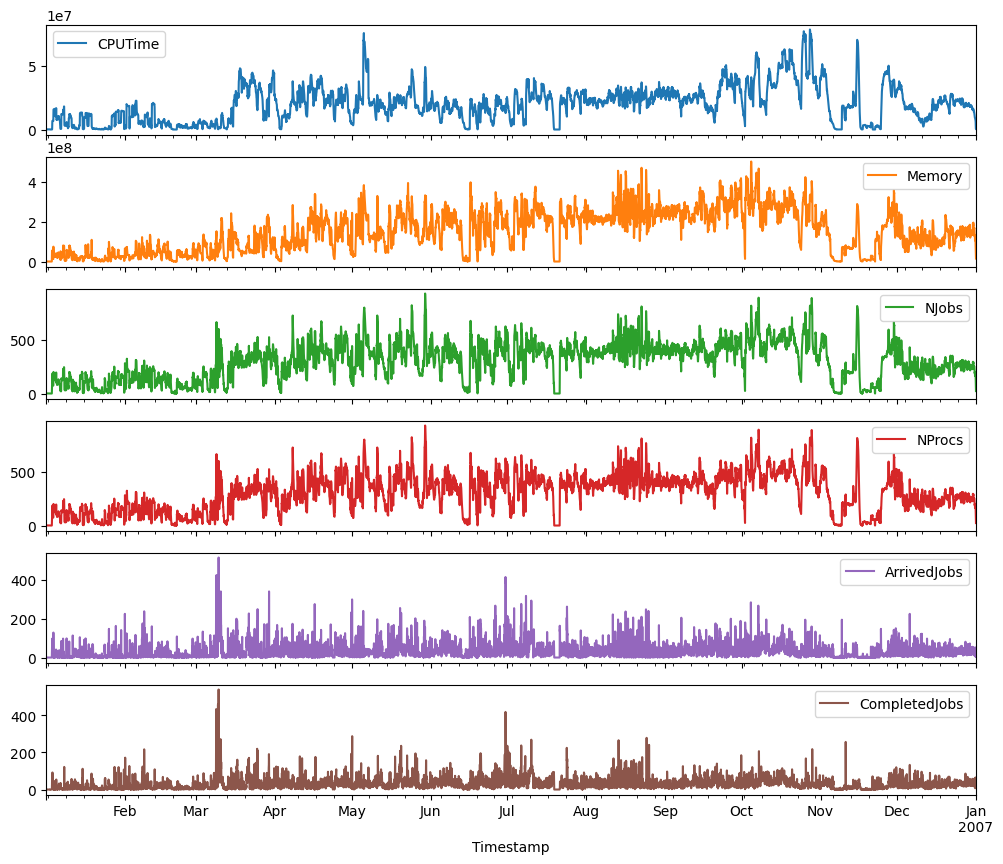

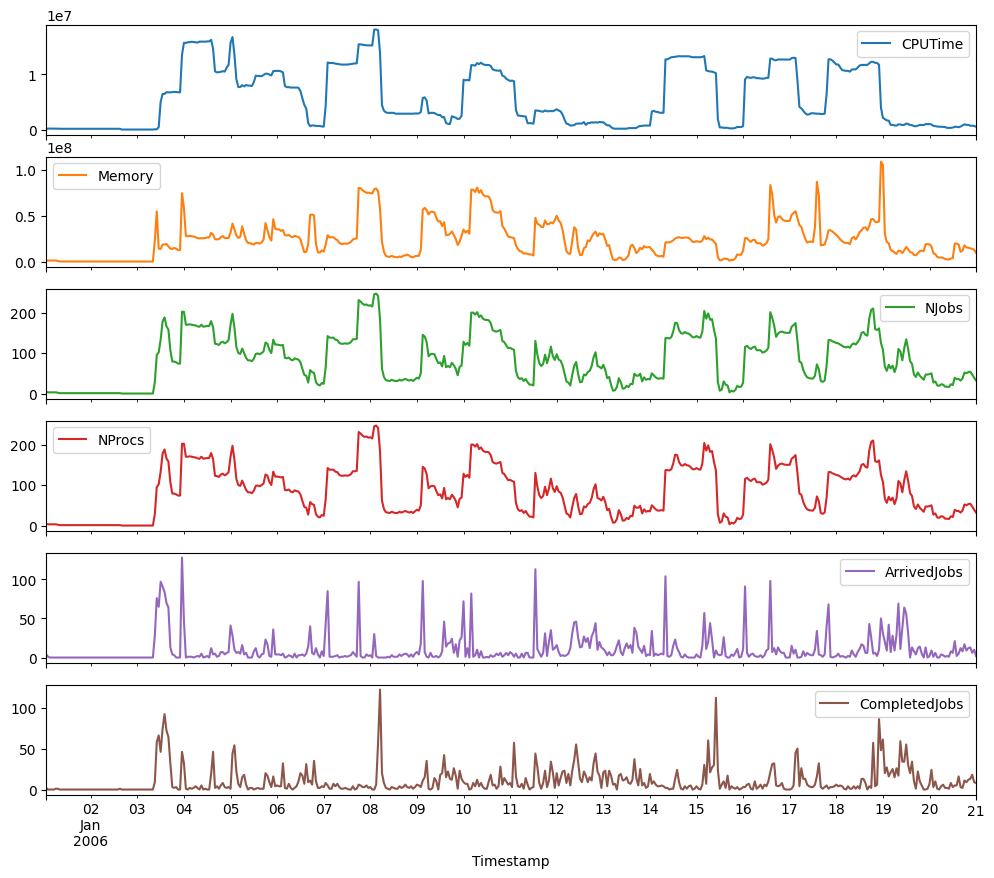

In [117]:
plot_cols = ['CPUTime', 'Memory', 'NJobs', 'NProcs', 'ArrivedJobs', 'CompletedJobs']
plot_features = dataset[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = dataset[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [118]:
dataset.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Timestamp,8760,2006-07-02 12:29:59.999999872,2006-01-01 01:00:00,2006-04-02 06:45:00,2006-07-02 12:30:00,2006-10-01 18:15:00,2007-01-01 00:00:00,NaN
CPUTime,8760.0,20307518.730251,0.0,9393881.5,20041677.0,27761268.75,78519173.0,13984339.574761
Memory,8760.0,152087483.011872,0.0,58374330.0,151515690.0,230545765.0,501468856.0,102595202.815666
NJobs,8760.0,305.309703,0.0,167.0,324.0,424.0,937.0,172.936552
NProcs,8760.0,305.309703,0.0,167.0,324.0,424.0,937.0,172.936552
ArrivedJobs,8760.0,31.029224,0.0,7.0,20.0,42.0,513.0,38.201625
CompletedJobs,8760.0,31.029224,0.0,10.0,23.0,41.0,540.0,33.258302


In [119]:
dataset["cosHour"] = dataset["Timestamp"].map(lambda timestamp: np.cos(2*np.pi*timestamp.hour/24))
dataset["sinHour"] = dataset["Timestamp"].map(lambda timestamp: np.sin(2*np.pi*timestamp.hour/24))

dataset["cosDay"] = dataset["Timestamp"].map(lambda timestamp: np.cos(2*np.pi*timestamp.timetuple().tm_yday/365))
dataset["sinDay"] = dataset["Timestamp"].map(lambda timestamp: np.sin(2*np.pi*timestamp.timetuple().tm_yday/365))


dataset.drop(columns=["Timestamp"], inplace=True)
# dataset.drop(columns=["ArrivedJobs", "CompletedJobs", 'NJobs'], inplace=True)

dataset.head()

,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs,cosHour,sinHour,cosDay,sinDay
0,157109,705984,4,4,4,2,0.965926,0.258819,0.999852,0.017213
1,175300,1101404,3,3,1,0,0.866025,0.500000,0.999852,0.017213
2,175300,1101404,3,3,0,0,0.707107,0.707107,0.999852,0.017213
3,175300,1101404,3,3,0,0,0.500000,0.866025,0.999852,0.017213
4,175300,1101404,3,3,0,0,0.258819,0.965926,0.999852,0.017213


In [120]:
column_indices = {name: i for i, name in enumerate(dataset.columns)}

n = len(dataset)
train_df = dataset[int(n*0):int(n*0.8)]
test_df = dataset[int(n*0.8):int(n*1.0)]

num_features = dataset.shape[1]

In [121]:
train_df.head()

,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs,cosHour,sinHour,cosDay,sinDay
0,157109,705984,4,4,4,2,0.965926,0.258819,0.999852,0.017213
1,175300,1101404,3,3,1,0,0.866025,0.500000,0.999852,0.017213
2,175300,1101404,3,3,0,0,0.707107,0.707107,0.999852,0.017213
3,175300,1101404,3,3,0,0,0.500000,0.866025,0.999852,0.017213
4,175300,1101404,3,3,0,0,0.258819,0.965926,0.999852,0.017213


In [122]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CPUTime,7008.0,1.961011e+07,1.293042e+07,0.000000,9.380714e+06,2.012375e+07,2.728363e+07,7.573649e+07
Memory,7008.0,1.568897e+08,1.057299e+08,0.000000,5.414695e+07,1.667062e+08,2.384062e+08,5.014689e+08
NJobs,7008.0,3.136203e+02,1.720531e+02,0.000000,1.650000e+02,3.480000e+02,4.330000e+02,9.370000e+02
NProcs,7008.0,3.136203e+02,1.720531e+02,0.000000,1.650000e+02,3.480000e+02,4.330000e+02,9.370000e+02
ArrivedJobs,7008.0,3.276869e+01,4.068124e+01,0.000000,7.000000e+00,2.000000e+01,4.400000e+01,5.130000e+02
CompletedJobs,7008.0,3.268550e+01,3.534041e+01,0.000000,1.100000e+01,2.400000e+01,4.300000e+01,5.400000e+02
cosHour,7008.0,-5.576463e-17,7.071572e-01,-1.000000,-7.071068e-01,-6.123234e-17,7.071068e-01,1.000000e+00
sinHour,7008.0,-1.875719e-17,7.071572e-01,-1.000000,-7.071068e-01,6.123234e-17,7.071068e-01,1.000000e+00
cosDay,7008.0,-1.904814e-01,6.579294e-01,-0.999963,-8.090170e-01,-3.090055e-01,3.090170e-01,9.998518e-01
sinDay,7008.0,1.356974e-01,7.159378e-01,-0.999991,-6.016241e-01,3.090141e-01,8.077447e-01,9.999907e-01


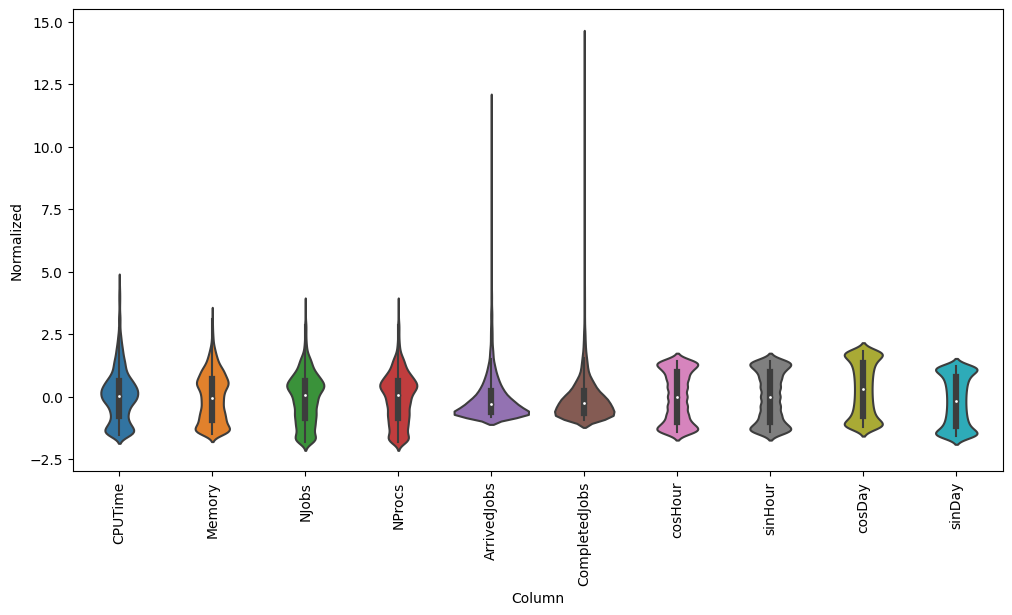

In [123]:
train_mean = train_df.mean()
train_std = train_df.std()

df_std = (dataset - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(dataset.keys(), rotation=90)

## Data windowing

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data. 

The main features of the input windows are:

- The width (number of time steps) of the input and label windows.
- The time offset between them.
- Which features are used as inputs, labels, or both. 


### 1. Indexes and offsets

Start by creating the `WindowGenerator` class. The `__init__` method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to `tf.data.Dataset`s of windows later.

In [124]:
import numpy as np

class WindowGenerator():
    def __init__(self, input_width, label_width, shift, label_columns, train_df = train_df, test_df = test_df):
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        self.total_window_size = input_width + shift
        self.label_columns = label_columns

        self.train_df = train_df
        self.test_df = test_df

        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}


In [125]:
def split_window(self, features):
    inputs = features[:, :self.input_width]
    labels = features[:, self.input_width:]
    if self.label_columns is not None:
        labels = labels[:, [self.label_columns_indices[label] for label in self.label_columns]]
    return inputs, labels

WindowGenerator.split_window = split_window

In [126]:
def make_dataset(self, data):
    features = np.array(data, dtype=np.float32)
    labels = np.array(data.iloc[:, [self.column_indices[column] for column in self.label_columns]], dtype=np.float32)
    ds_features = []
    ds_labels = []
    for i in range(len(data) - self.total_window_size + 1):
        ds_features.append(features[i:i+self.input_width][0])
        ds_labels.append(labels[i+self.input_width:i+self.total_window_size][0])
    ds_features = np.array(ds_features)
    ds_labels = np.array(ds_labels)

    return ds_features, ds_labels

WindowGenerator.make_dataset = make_dataset

In [127]:
@property
def train(self):
    inputs, labels = self.make_dataset(self.train_df)
    return inputs, labels

@property
def test(self):
    inputs, labels = self.make_dataset(self.test_df)
    return inputs, labels

@property
def example(self):
    return self.train  # Return the training dataset for plotting

WindowGenerator.train = train
WindowGenerator.test = test
WindowGenerator.example = example


In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=["CPUTime"])

# Assuming you have your data loaded into `x_train` and `y_train`
x_train, y_train = window.train

# Assuming you have your data loaded into `x_test` and `y_test`
x_test, y_test = window.test

# Create and fit the regression model
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

# Make predictions using the regression model
y_pred = regression_model.predict(x_test)

me = np.sum(y_test - y_pred) / len(y_test)
print("ME: ", me)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

normalised_MAE = mae / np.mean(y_test)
print("SMAPE: ", normalised_MAE)

r2 = r2_score(y_test, y_pred)
print("R2: ", r2)



ME:  -28927.817247287265
MAE:  666721.5
SMAPE:  0.028892424
R2:  0.9953918013607598


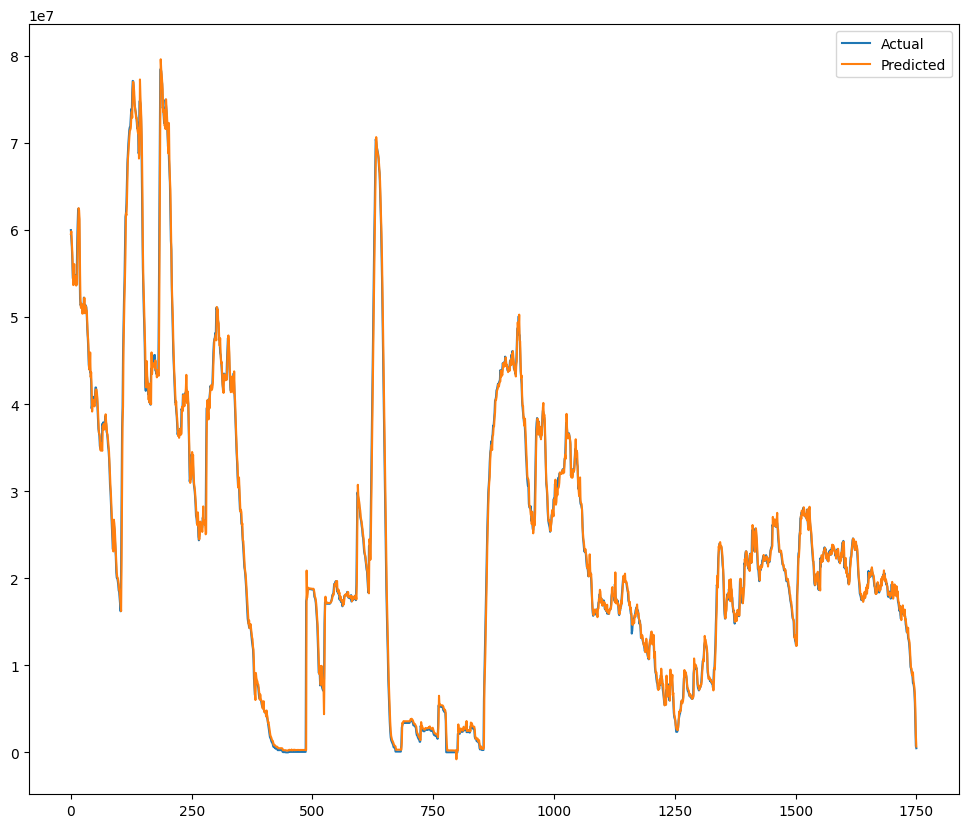

In [129]:
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()

<BarContainer object of 10 artists>

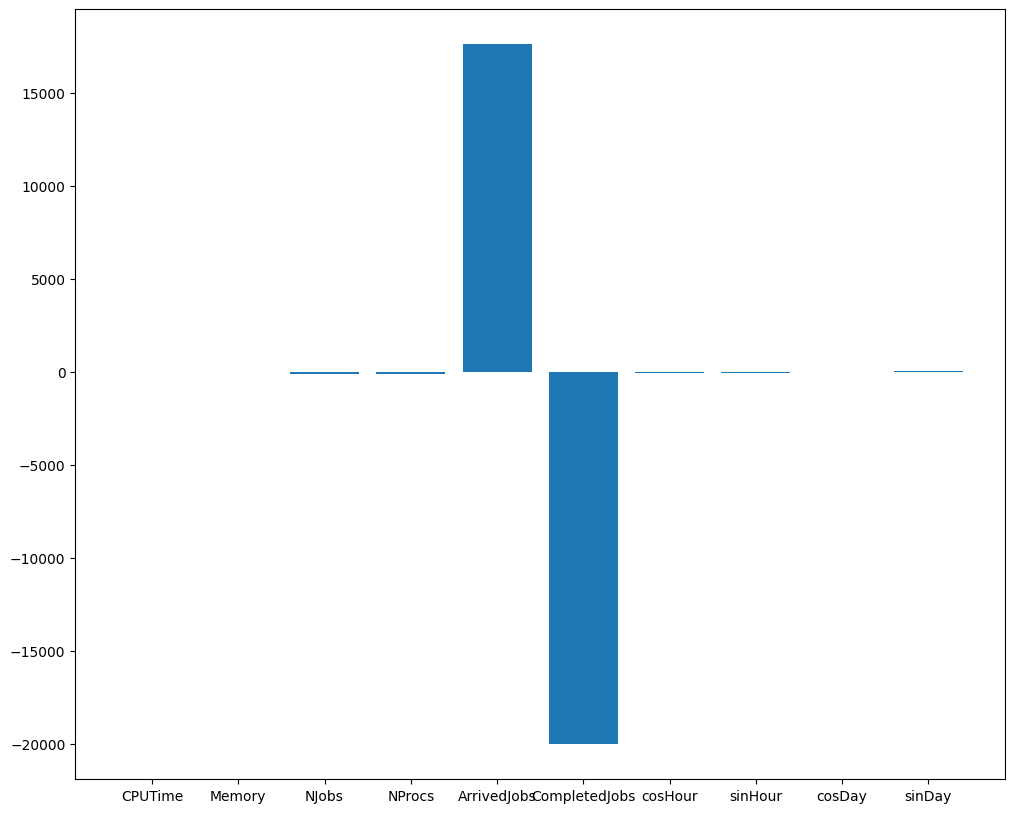

In [130]:
plt.bar(train_df.columns, regression_model.coef_[0])

In [145]:
test_ds = pd.read_csv("./datasets/final/final-formed-sharcnet.csv", delimiter=',', date_parser=dateParser, parse_dates=['Timestamp'])
test_ds["cosHour"] = test_ds["Timestamp"].map(lambda timestamp: np.cos(2*np.pi*timestamp.hour/24))
test_ds["sinHour"] = test_ds["Timestamp"].map(lambda timestamp: np.sin(2*np.pi*timestamp.hour/24))

test_ds["cosDay"] = test_ds["Timestamp"].map(lambda timestamp: np.cos(2*np.pi*timestamp.timetuple().tm_yday/365))
test_ds["sinDay"] = test_ds["Timestamp"].map(lambda timestamp: np.sin(2*np.pi*timestamp.timetuple().tm_yday/365))


test_ds.drop(columns=["Timestamp"], inplace=True)
# dataset.drop(columns=["ArrivedJobs", "CompletedJobs", 'NJobs'], inplace=True)

test_window = WindowGenerator(input_width=1, label_width=1, shift=1, label_columns=["CPUTime"], train_df=test_ds, test_df=test_ds)

x_test_ds, y_test_ds = test_window.test

# Make out-of-sample predictions
oos_pred = regression_model.predict(x_test_ds)

#truncate negative values
oos_pred = oos_pred.clip(min=0)

me = np.sum(y_test_ds - oos_pred) / len(y_test_ds)
print("ME: ", me)

mae = mean_absolute_error(y_test_ds, oos_pred)
print("MAE: ", mae)

normalised_MAE = mae / np.mean(y_test_ds)
print("SMAPE: ", normalised_MAE)

r2 = r2_score(y_test_ds, oos_pred)
print("R2: ", r2)



ME:  2679743.9386123843
MAE:  7490493.0
SMAPE:  0.022159344
R2:  0.989024035917219


/var/folders/rz/x38ry1m901jcjct47ydtrgph0000gn/T/ipykernel_55556/2581635805.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  test_ds = pd.read_csv("./datasets/final/final-formed-sharcnet.csv", delimiter=',', date_parser=dateParser, parse_dates=['Timestamp'])


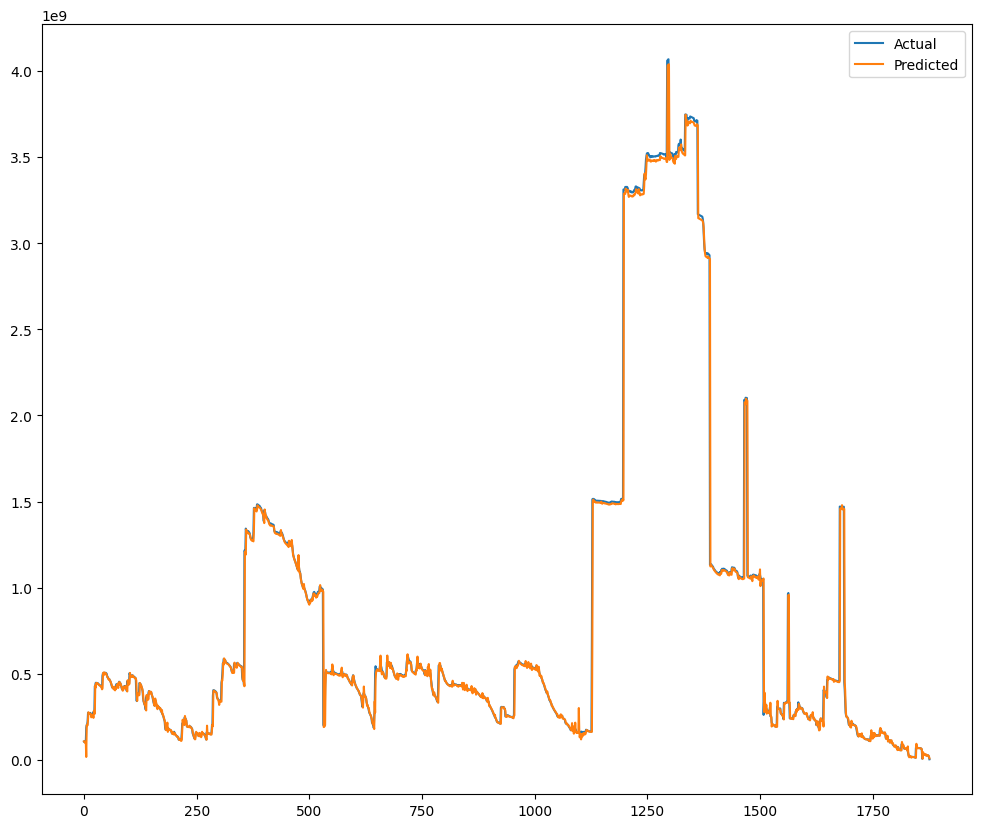

In [146]:
plt.plot(y_test_ds[int(len(y_test_ds)*0.8):], label="Actual")
plt.plot(oos_pred[int(len(y_test_ds)*0.8):], label="Predicted")
plt.legend()
plt.show()

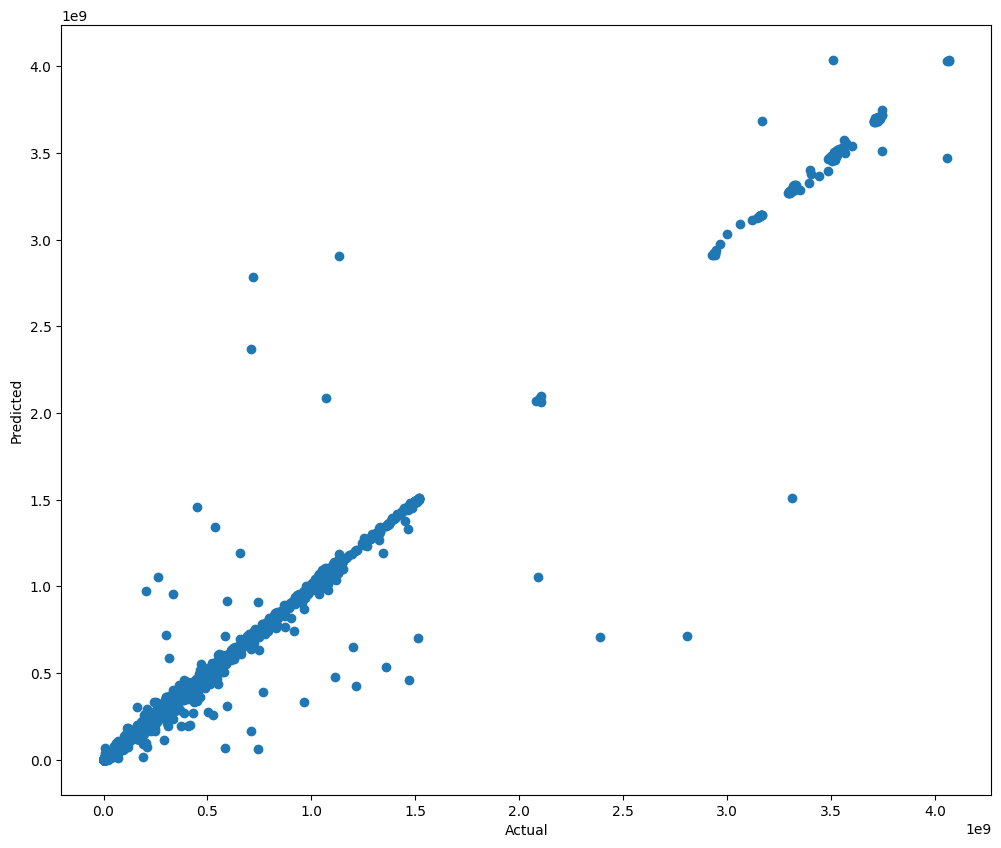

In [147]:
plt.plot(y_test_ds, oos_pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()